# The *Titanic* dataset

In [1]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib notebook

In [3]:
ttrain = pd.read_csv("titanic_train.csv", index_col=0)
ttrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ttrain.describe()[["Survived"]]

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
ttrain.groupby("Survived").describe().T

Survived               0           1
Age    count  424.000000  290.000000
       mean    30.626179   28.343690
       std     14.172110   14.950952
       min      1.000000    0.420000
       25%     21.000000   19.000000
       50%     28.000000   28.000000
       75%     39.000000   36.000000
       max     74.000000   80.000000
Fare   count  549.000000  342.000000
       mean    22.117887   48.395408
       std     31.388207   66.596998
       min      0.000000    0.000000
       25%      7.854200   12.475000
       50%     10.500000   26.000000
       75%     26.000000   57.000000
       max    263.000000  512.329200
Parch  count  549.000000  342.000000
       mean     0.329690    0.464912
       std      0.823166    0.771712
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      0.000000    1.000000
       max      6.000000    5.000000
Pclass count  549.000000  342.000000
       mean     2.531876    1.950292
       std      0.735805    0.863321
       min      1.000000    1.000000
       25%      2.000000    1.000000
       50%      3.000000    2.000000
       75%      3.000000    3.000000
       max      3.000000    3.000000
SibSp  count  549.000000  342.000000
       mean     0.553734    0.473684
       std      1.288399    0.708688
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      1.000000    1.000000
       max      8.000000    4.000000

<IPython.core.display.Javascript object>


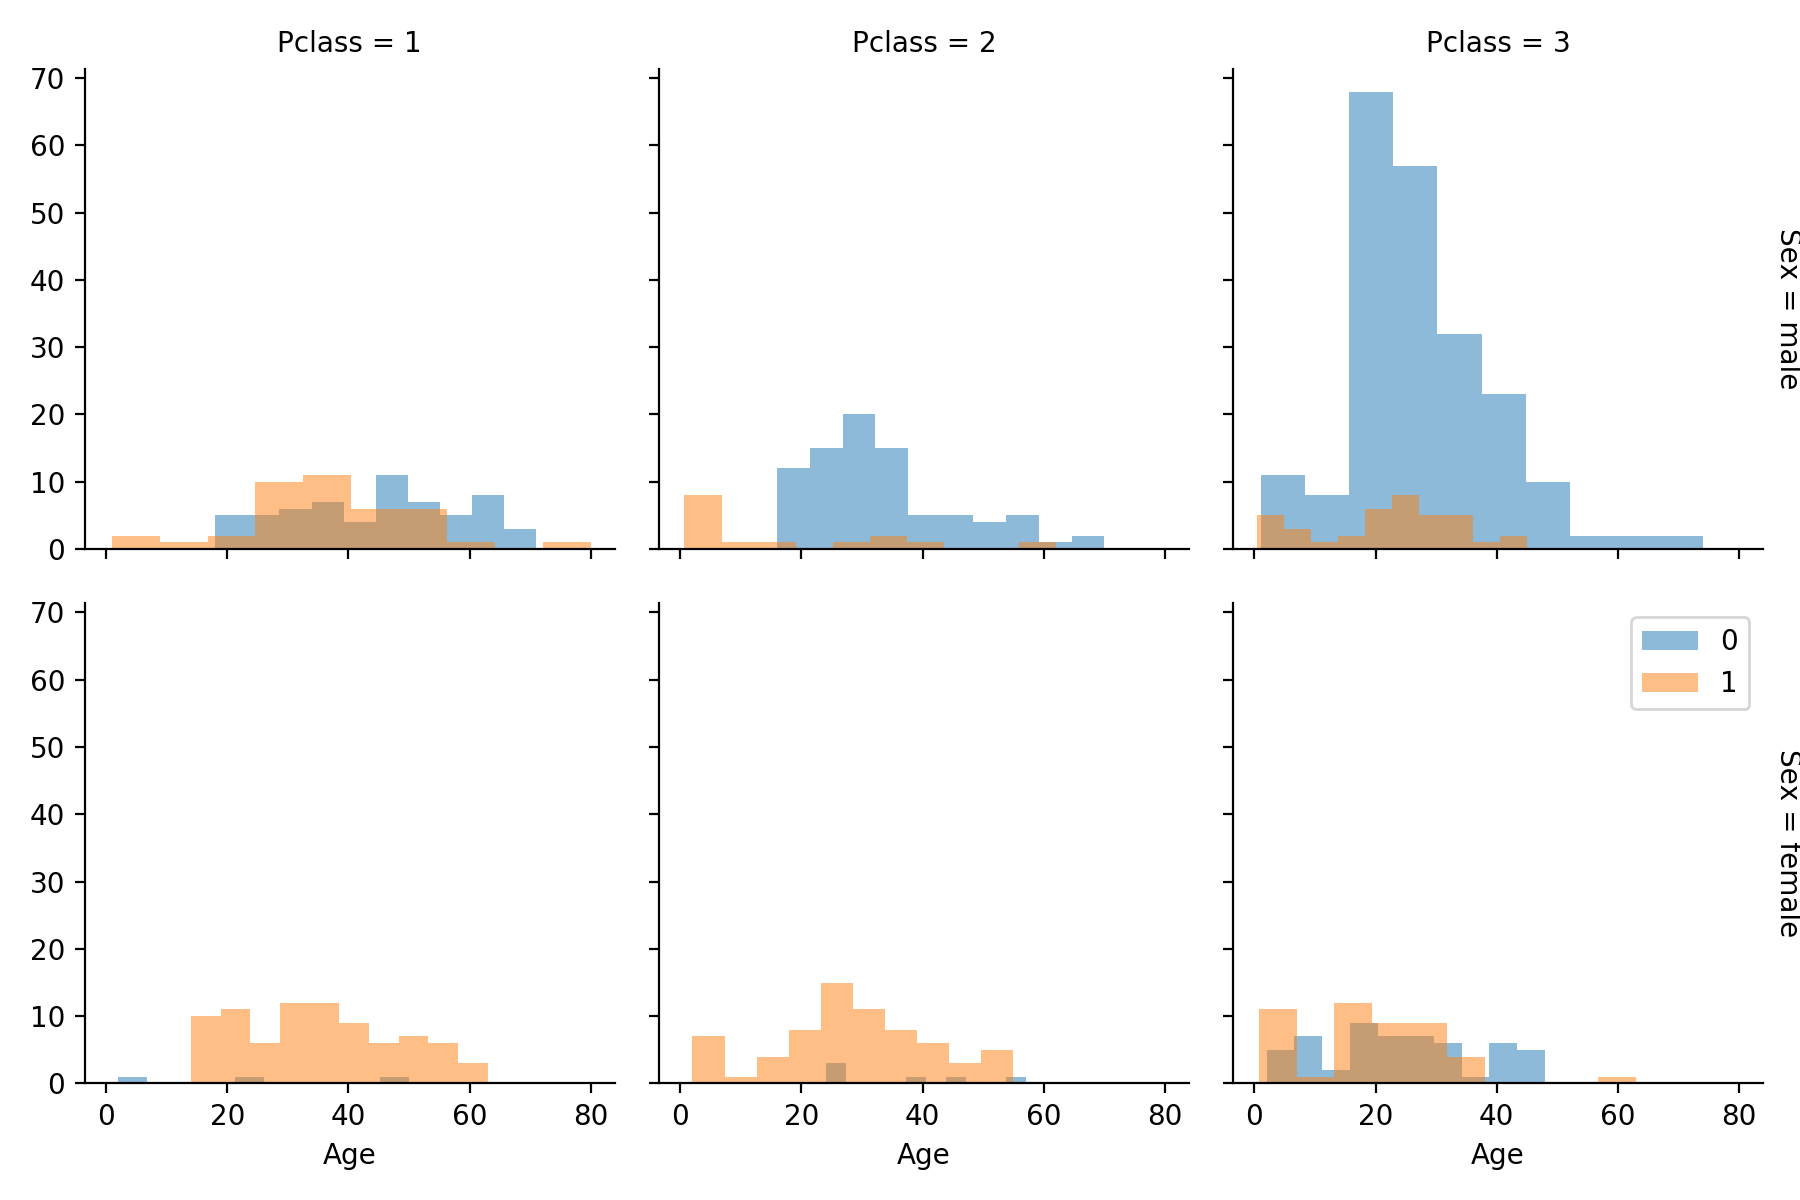

In [57]:
gr = sns.FacetGrid(ttrain, row="Sex", col="Pclass", hue="Survived",  margin_titles=True)
gr.map(plt.hist, "Age", alpha=0.5)
plt.legend();

In [55]:
ttrain.query("Sex=='female' and Pclass==2").groupby("Survived").agg({"Sex":"count", "Age":"mean"})

,Sex,Age
Survived,,
0,6,36.000000
1,70,28.080882


In [49]:
ttrain.groupby("Survived").mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [48]:
ttrain.groupby(["Pclass", "Survived"]).mean()

Age     SibSp     Parch       Fare
Pclass Survived                                          
1      0         43.695312  0.287500  0.300000  64.684008
       1         35.368197  0.492647  0.389706  95.608029
2      0         33.544444  0.319588  0.144330  19.412328
       1         25.901566  0.494253  0.643678  22.055700
3      0         26.555556  0.672043  0.384409  13.669364
       1         20.646118  0.436975  0.420168  13.694887

Among those who survived, passengersin the third class more than those from 2 onwards. On the other hand, young people survived more.

Considering those who had siblings and / or spouses aboard perished more than those who did not. On the contrary, people who had Parents and / or children survived on a greater proportion than those who did not.

<IPython.core.display.Javascript object>


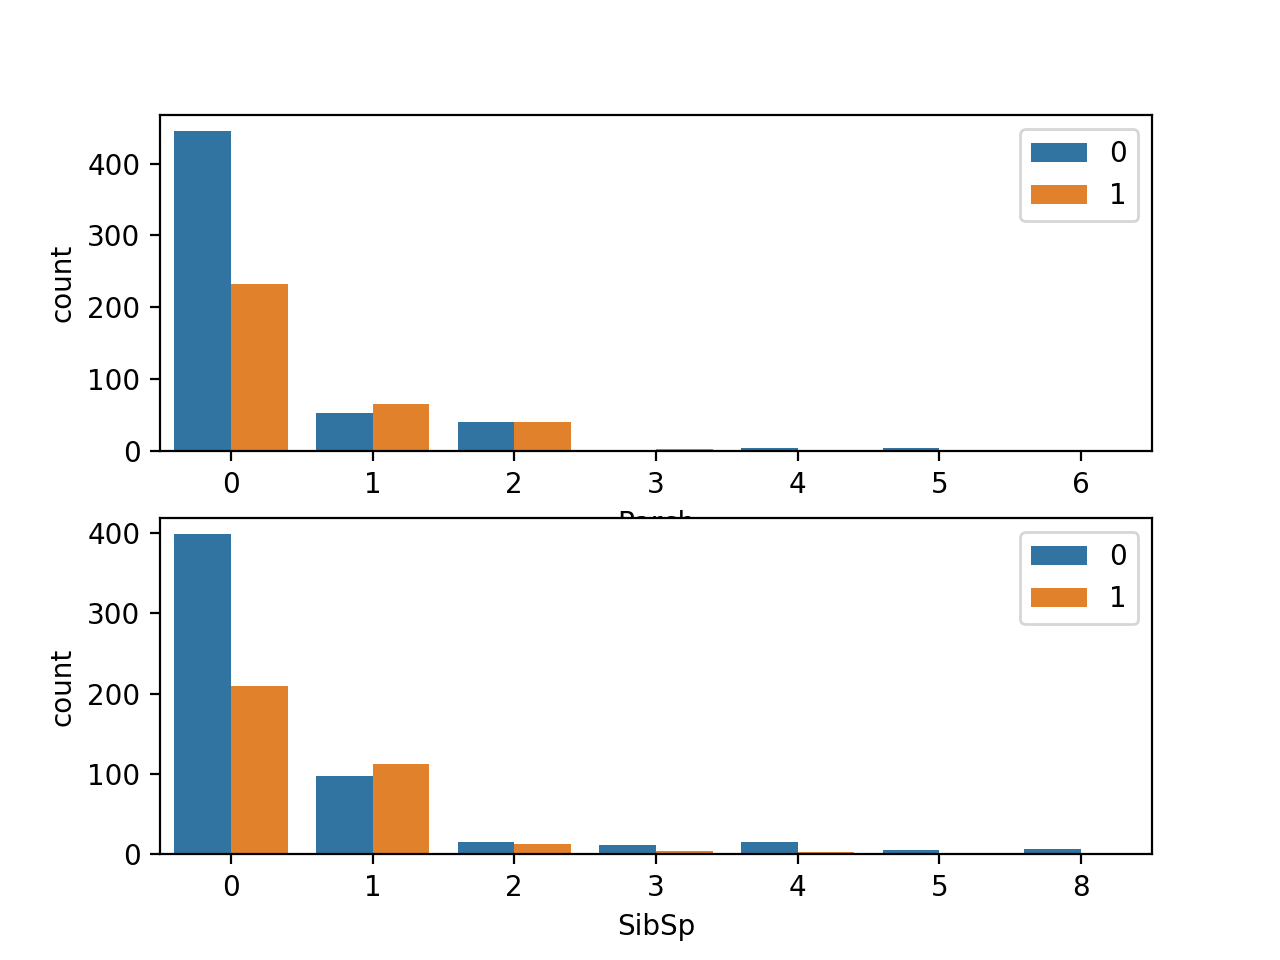

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
sns.countplot(x="Parch", hue="Survived", data=ttrain, ax=ax1)
ax1.legend(loc="upper right")
sns.countplot(x="SibSp", hue="Survived", data=ttrain, ax=ax2)
ax2.legend(loc="upper right")

---------
# Preparing the dataset for the ML model

In [395]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    """
    def __init__(self, attribute_names, dtype=None, return_df=False):
        self.attribute_names = attribute_names
        self.dtype = dtype
        self.return_df = return_df
    def fit(self, X, y=None):
        return self
    def transform(self, X, dtype=None):
        Xfinal = X[self.attribute_names]
        if not self.return_df:
            Xfinal = Xfinal.values
            if self.dtype is not None:
                Xfinal = Xfinal.astype(self.dtype)
        return Xfinal

In [403]:
class LabelImputer(BaseEstimator, TransformerMixin):
    """
    Replaces NaNs in categorical pandas dataset to the most
    common value in a column 
    """
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Xcopy = X.copy()
        for col in Xcopy:
            where_nan = pd.isnull(Xcopy[col])
            stat = np.argmax(Xcopy[col].value_counts())
            Xcopy.loc[where_nan, col] = stat
        return Xcopy.values

In [438]:
mltrain = ttrain.drop(["Name", "Cabin", "Ticket"], 1)
mltrain = pd.get_dummies(mltrain)
mltrain_inputs = mltrain.drop("Survived", 1)
mltrain_target = mltrain["Survived"].values

In [407]:
from sklearn.preprocessing import LabelBinarizer, Imputer, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion

In [495]:
num_attrs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_attrs = [c for c in mltrain_inputs.columns if c not in num_attrs]

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attrs, dtype="object", return_df=True)),
    ("imputer", LabelImputer())
])

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attrs)),
    ("imputer", Imputer(strategy="mean")),
])

full_pipeline = FeatureUnion([
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [496]:
total_pipe = full_pipeline
mltrain_prepared = total_pipe.fit_transform(mltrain_inputs)

In [497]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

logr = LogisticRegression()
scores = cross_val_score(logr, mltrain_prepared, mltrain_target, cv=10, scoring="accuracy")

print(f"Mean: {scores.mean():0.4f}")
print(f"Std: {scores.std():>7.4f}")

Mean: 0.7958
Std:  0.0255


In [481]:
mltest = pd.read_csv("titanic_test.csv")
mltest_prep = pd.get_dummies(mltest.drop(["Name", "Cabin"], axis=1))
mltest_prep = full_pipeline.fit_transform(mltest_prep)

In [494]:
logr.fit(mltrain_prepared, mltrain_target)
pred = logr.predict(mltest_prep)
pred = pd.DataFrame({"Survived": pred}, index=mltest.PassengerId.values)
pred.index.name = "PassengerId"
pred.to_csv("prediction_titanic.csv")